Questions to be answered & visualizations to be made - 
1. How 'age' of the person, affects the user advertisement click.
2. How 'gender' of the person, affects the user advertisement click.
3. How 'country' of the person, affects the user advertisement click.
4. How 'daily internet usage' of the person, affects the user advertisement click.


In [31]:
import pandas as pd

In [32]:
data = pd.read_csv('advertising.csv')

In [33]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 3:36,0


In [34]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

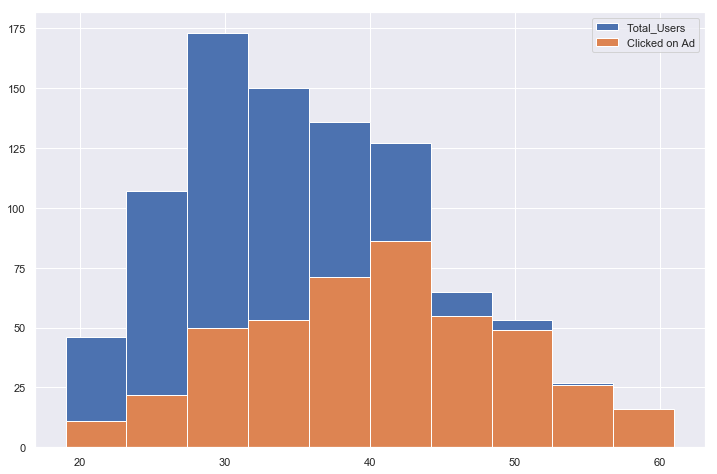

In [36]:
plt.hist(data['Age'], label = 'Total_Users')
plt.hist(data['Age'][data['Clicked on Ad'] == 1], label = 'Clicked on Ad')
plt.legend()

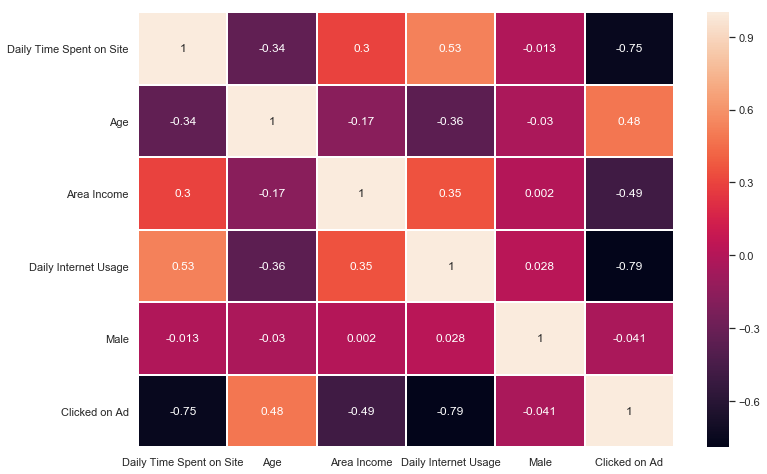

In [37]:
sns.heatmap(data.corr(), annot = True, linewidth = 1, linecolor = 'w')

In [38]:
training_data = data[['Age', 'Daily Time Spent on Site', 'Daily Internet Usage']]

In [42]:
output_data = data['Clicked on Ad']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X, x_test, Y, y_test = train_test_split(training_data, output_data,test_size = 0.3, random_state = 42)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression()

In [47]:
model.fit(X, Y)

F:\Anaconda Python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
predictions = model.predict(x_test)

In [49]:
predictions[:10]

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [51]:
confusion_matrix(predictions, y_test)

array([[126,  12],
       [  5, 127]], dtype=int64)

In [52]:
score = accuracy_score(predictions, y_test)
score

0.937037037037037

In [57]:
total = data.groupby(['Male'])['Clicked on Ad'].count()

In [58]:
total

Male
0    465
1    435
Name: Clicked on Ad, dtype: int64

In [59]:
total = pd.crosstab(data['Male'], data['Clicked on Ad'])

In [60]:
total

Clicked on Ad,0,1
Male,,
0,229,236
1,232,203


(array([0, 1]), <a list of 2 Text xticklabel objects>)

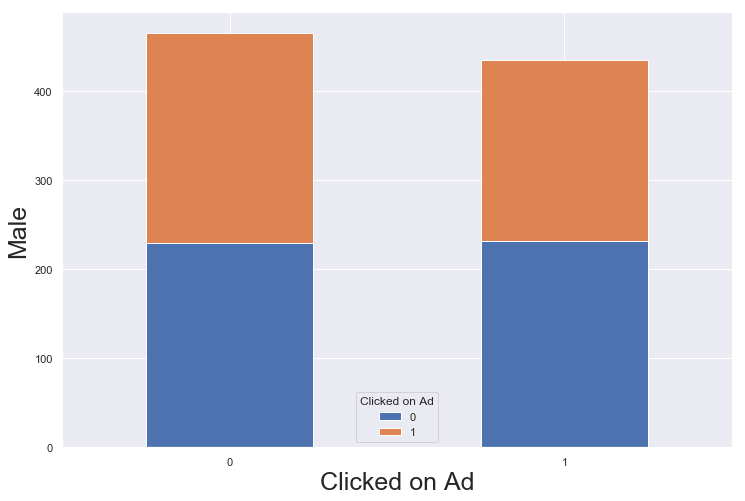

In [61]:
font = {
    'size' : 25
}
sns.set(rc={'figure.figsize':(12, 8)})
total.plot(kind='bar', stacked=True)
plt.xlabel('Clicked on Ad', fontdict=font)
plt.ylabel('Male', fontdict=font)
plt.xticks(rotation=0)

In [62]:
total['Total'] = total.sum(axis = 1)

In [63]:
total  = total.apply(lambda x: round (100 * x/total['Total']))

In [64]:
total.drop('Total', axis = 1, inplace = True)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

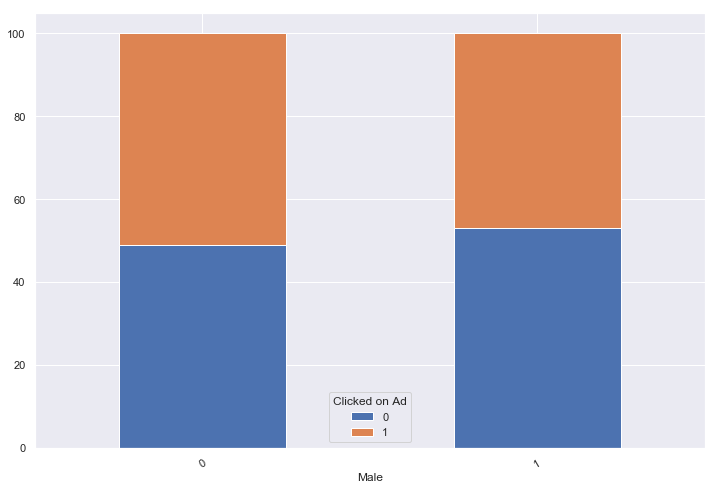

In [65]:
total.plot(kind = 'bar', stacked = True)
plt.xticks(rotation = 30)

In [66]:
training_data = data[['Male', 'Daily Time Spent on Site', 'Daily Internet Usage']]

In [67]:
output_data = data['Clicked on Ad']

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X, x_test, Y, y_test = train_test_split(training_data, output_data,test_size = 0.3, random_state = 42)

In [70]:
from sklearn.linear_model import LogisticRegression

In [72]:
model = LogisticRegression()

In [73]:
model.fit(X, Y)

F:\Anaconda Python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [74]:
predictions = model.predict(x_test)

In [75]:
predictions[:10]

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [78]:
confusion_matrix(predictions, y_test)


array([[128,  11],
       [  3, 128]], dtype=int64)

In [79]:
score = accuracy_score(predictions, y_test)
score

0.9481481481481482